In [9]:
import numpy as np
import mlgrad.sag as sag
import mlgrad.model as model
import mlgrad.func as func
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [10]:
X, Y, coef = make_regression(n_samples=200, n_features=50, n_informative=10, coef=True)
#print(X.shape, Y.shape, Z.shape)

In [11]:
lm1 = model.LinearModel([1.5,1.5])
lm2 = model.LinearModel([0.5,2.5])

In [12]:
def F(x):
    return np.log(0.4*np.exp(lm1.evaluate(x)) + 0.6*np.exp(lm2.evaluate(x)))

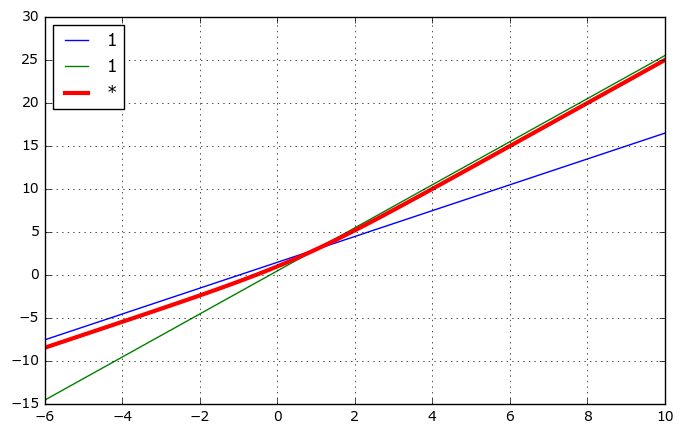

In [13]:
X = np.linspace(-6.,10.,100)
X1 = X.reshape((-1,1))
Y1 = [lm1.evaluate(x) for x in X1]
Y2 = [lm2.evaluate(x) for x in X1]
Z = [F(x) for x in X1]
plt.figure(figsize=(8,5))
plt.plot(X, Y1, label='1')
plt.plot(X, Y2, label='1')
plt.plot(X, Z, label='*', linewidth=3.)
plt.legend(loc='best')
plt.grid(1)
plt.show()

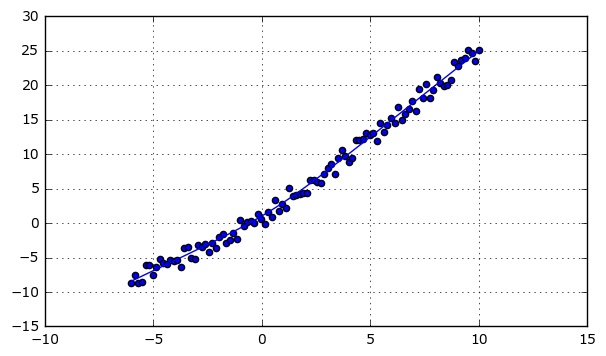

In [14]:
U1 = np.asarray([F(x) for x in X1])
#print(U1)
dU = 2*np.random.random(U1.shape)-1
U2 = U1 + 1.5*dU
plt.figure(figsize=(7,4))
plt.plot(X, U1)
plt.scatter(X, U2)
plt.grid(1)
plt.show()

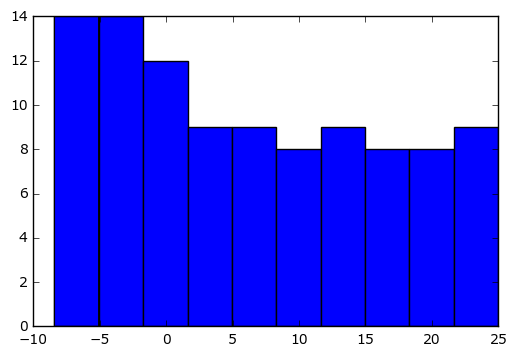

In [15]:
plt.figure()
plt.hist(U1)
plt.show()

1000 0.037821482602118 [ 1.99626849  2.09919973]
1000 0.017094017094017092 [ 2.10328732  2.13174111]
62 0.002911716748194736 [ 2.11076179  2.14936863]
1000 0.04672897196261685 [ 1.9797682   2.19409658]
1000 0.05387931034482757 [ 2.14749495  2.15592996]


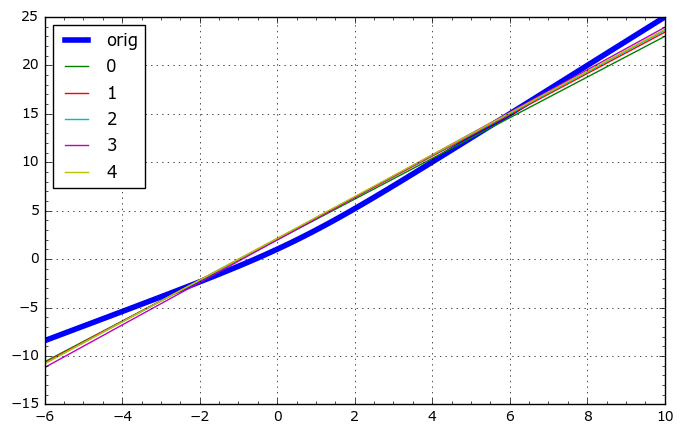

In [16]:
plt.figure(figsize=(8,5))
plt.plot(X, U1, label='orig', linewidth=4.0)
#plt.scatter(X, U2)
params = []
for i in range(5):
    param0 = 3.*np.random.random((2,))
    lm = model.LinearModel(param0)
    alg = sag.SAG(lm, loss=func.Logistic(1.0), h=0.5, tol=0.0001)
    alg.fit(X1, U1)
    print(alg.K, alg.h_mean, np.asarray(lm.param))
    params.append(lm.param.base)
    plt.plot(X1, [lm.evaluate(x) for x in X1], label=str(i))
plt.legend(loc='best')
plt.grid(1)
plt.minorticks_on()
plt.show()

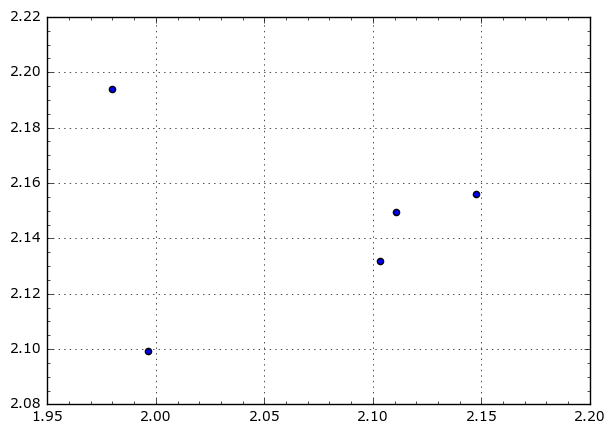

In [17]:
plt.figure(figsize=(7,5))
Xs, Ys = zip(*params)
plt.scatter(Xs, Ys)
plt.grid(1)
plt.minorticks_on()
plt.show()